In [1]:
### Run this worksheet NINTH in sequence. 

# This worksheet performs principal component analysis (PCA) on the World Bank dataset.

import pandas as pd
from sklearn.decomposition import PCA
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

bankdata = pd.read_csv('Modified_Data/AidVotesBank.csv')

In [2]:
# Confirm the structure of the data

test = bankdata[['issue', 'vote_foreign', 'code']].drop_duplicates()
test

,issue,vote_foreign,code
0,627.0,3,AFG
1,628.0,2,AFG
2,629.0,1,AFG
3,630.0,3,AFG
4,631.0,1,AFG
5,632.0,1,AFG
6,633.0,1,AFG
7,634.0,3,AFG
8,635.0,3,AFG
9,636.0,3,AFG


In [3]:
# Transform voting data into a matrix of 0's and 1's (1 means yes, 0 means any other vote)
# Rows represent countries, and columns represent resolutions.

pivot = pd.pivot(test, index='issue', columns='code', values='vote_foreign')
pivot

code,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,...,UZB,VCT,VEN,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
issue,,,,,,,,,,,,,,,,,,,,,
627.0,3.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
628.0,2.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
629.0,1.0,NaN,2.0,NaN,NaN,3.0,NaN,NaN,3.0,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
630.0,3.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
631.0,1.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,3.0,2.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
632.0,1.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,3.0,2.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
633.0,1.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,3.0,2.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
634.0,3.0,NaN,3.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
635.0,3.0,NaN,3.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [4]:
# Count 'yes' votes as 1 and all other results as 0
vote_df = pivot.eq(1).mul(1)
vote_df

code,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,...,UZB,VCT,VEN,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
issue,,,,,,,,,,,,,,,,,,,,,
627.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
628.0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
629.0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
630.0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
631.0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
632.0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
633.0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
634.0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
635.0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
# View a sample of the data

vote_df.iloc[0:5, 0:5]

code,AFG,AGO,ALB,AND,ARE
issue,,,,,
627.0,0,0,0,0,0
628.0,0,0,0,0,0
629.0,1,0,0,0,0
630.0,0,0,0,0,0
631.0,1,0,1,0,0


In [6]:
# Strip non-numeric data from the array
import numpy as np
vote_matrix = np.array(vote_df)
vote_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
# Test whether 'yes' votes or 'no' votes are more prevalent
np.sum(vote_matrix)

576676

In [8]:
vote_matrix.shape

(4940L, 192L)

In [9]:
4940 * 192

948480

In [10]:
# Generate additional arrays for abstension votes and no votes in case these are needed later
vote_abs = pivot.eq(2).mul(1)
abs_matrix = np.array(vote_abs)
np.sum(abs_matrix)

161934

In [11]:
vote_no = pivot.eq(3).mul(1)
no_matrix = np.array(vote_abs)
np.sum(no_matrix)

161934

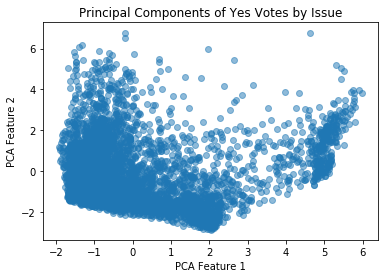

In [12]:
# Perform PCA on the matrix of no votes.
import matplotlib.pyplot as plt

pca_no = PCA(n_components=2)
vote_no_pca = pca_no.fit_transform(no_matrix)
vote_no_x = vote_no_pca[:, 0]
vote_no_y = vote_no_pca[:, 1]

plt.scatter(vote_no_x, vote_no_y, alpha=0.5)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Principal Components of Yes Votes by Issue')
plt.show()

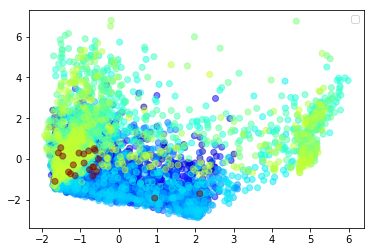

In [13]:
# Color the scatterplot based on position in the overall database
plt.scatter(vote_no_x, vote_no_y, c=vote_df.index, cmap='jet', alpha=0.5)
plt.legend()
plt.show()

In [14]:
#Not too much data is lost by dropping duplicate entries
bankdata[['issue', 'vote_foreign', 'code']].drop_duplicates()

,issue,vote_foreign,code
0,627.0,3,AFG
1,628.0,2,AFG
2,629.0,1,AFG
3,630.0,3,AFG
4,631.0,1,AFG
5,632.0,1,AFG
6,633.0,1,AFG
7,634.0,3,AFG
8,635.0,3,AFG
9,636.0,3,AFG


In [15]:
#Only a few more rows are contained if duplicates are included
bankdata[['issue', 'vote_foreign', 'code']].shape

(790903, 3)

Text(0.5,1,'Principal Components of Yes Votes by Issue')

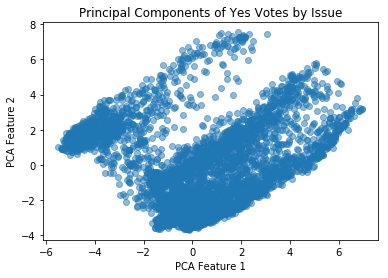

In [16]:
# Perform PCA on the matrix of yes votes.
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
vote_pca = pca.fit_transform(vote_matrix)
vote_x = vote_pca[:, 0]
vote_y = vote_pca[:, 1]

plt.scatter(vote_x, vote_y, alpha=0.5)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Principal Components of Yes Votes by Issue')
#plt.show()

In [17]:
# Confirm the structure of the data.
vote_pca.shape

(4940L, 2L)

In [18]:
vote_matrix.shape

(4940L, 192L)

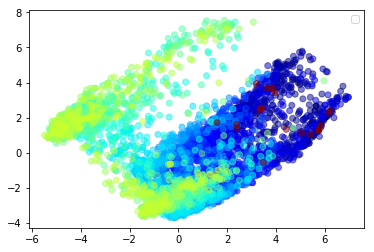

In [19]:
# Color the scatterplot of the PCA matrix based on position in the overall database
# Votes further down in the database have higher ID numbers and occurred later in time.
# This means the colorization shows how the PCA of the General Assembly as a whole changed over time.

plt.scatter(vote_x, vote_y, c=vote_df.index, cmap='jet', alpha=0.5)
plt.legend()
plt.show()

In [20]:
# Transpose the matrix in order to conduct PCA based on country, rather than based on year.
vote_matrix_countries = np.transpose(vote_matrix)

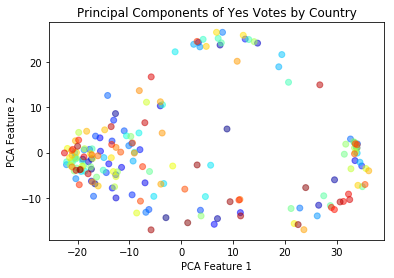

In [21]:
# Clusters countries' votes alphabetically, with no data about any given country.
# As expected, the colors appear to be random; alphabetized country names are not politically predictive.

pca2 = PCA(n_components=2)
vote_pca_countries = pca2.fit_transform(vote_matrix_countries)
vote_x = vote_pca_countries[:, 0]
vote_y = vote_pca_countries[:, 1]

plt.scatter(vote_x, vote_y, c=range(192), cmap='jet',alpha=0.5)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Principal Components of Yes Votes by Country')
plt.show()

In [22]:
# Examine GINI coefficients to see if this would be a useful variable for PCA.
# GINI does not seem like a good candidate -- there are too many missing variables and the range is too small.
bankdata[['code', 'gini']].drop_duplicates()

,code,gini
0,AFG,NaN
5029,AGO,NaN
7577,AGO,52.0
8168,AGO,42.7
8900,ALB,NaN
12241,ALB,27.0
12651,ALB,31.7
12870,ALB,30.6
13108,ALB,30.0
13383,ALB,29.0


In [23]:
# Calculate the average per capita GDP for each country over the entire length of its voting history in the UN.
percapitas = bankdata.groupby(['code'])['GDPpercap'].mean()
percapitas = percapitas.fillna(500)
percapitas.values.shape

(192L,)

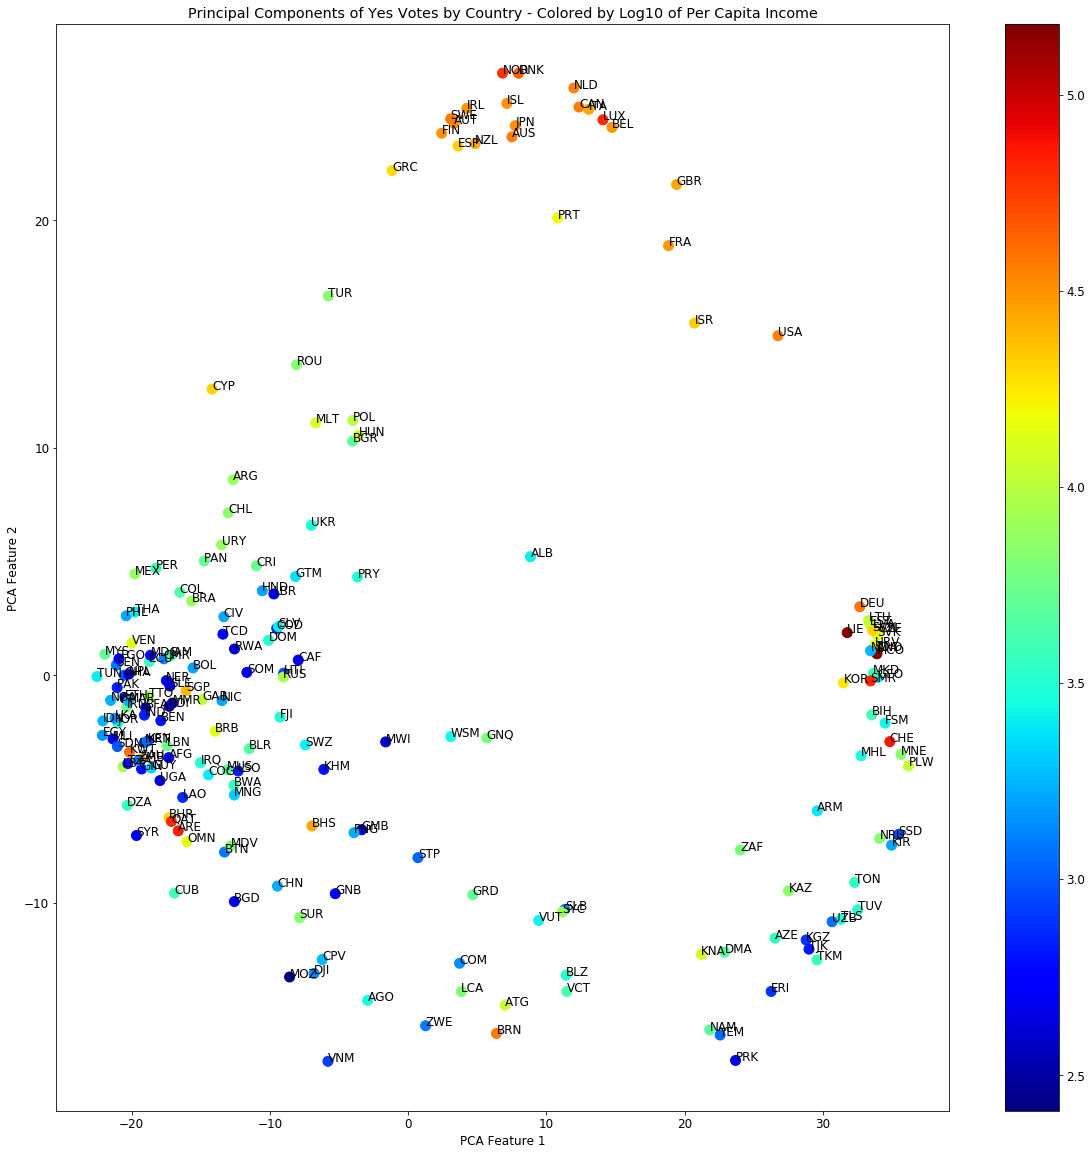

In [24]:
# Colorize the PCA of yes votes based on each country's average per capita GDP.

rcParams['figure.figsize'] = 20, 20
plt.rcParams.update({'font.size': 12})



pca2 = PCA(n_components=2)
vote_pca_countries = pca2.fit_transform(vote_matrix_countries)
vote_x = vote_pca_countries[:, 0]
vote_y = vote_pca_countries[:, 1]


pca_df = pd.DataFrame({'x':vote_x, 'y':vote_y}, 
                  index=list(vote_df.columns))

#plt.scatter(vote_x, vote_y, c=np.log(percapitas.values), cmap='jet',alpha=0.5, ax=ax)
#pca_df = pd.DataFrame(vote_x, vote_y)

fig, ax = plt.subplots()
pca_df.plot('x', 'y', kind='scatter', c=np.log10(percapitas.values), cmap='jet', alpha=1, ax=ax ,s=100)

for k, v in pca_df.iterrows():
    ax.annotate(k, v)

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Principal Components of Yes Votes by Country - Colored by Log10 of Per Capita Income')    

# Export to new file
pca_df.to_csv("Modified_Data/PCA_yes.csv")

plt.show()

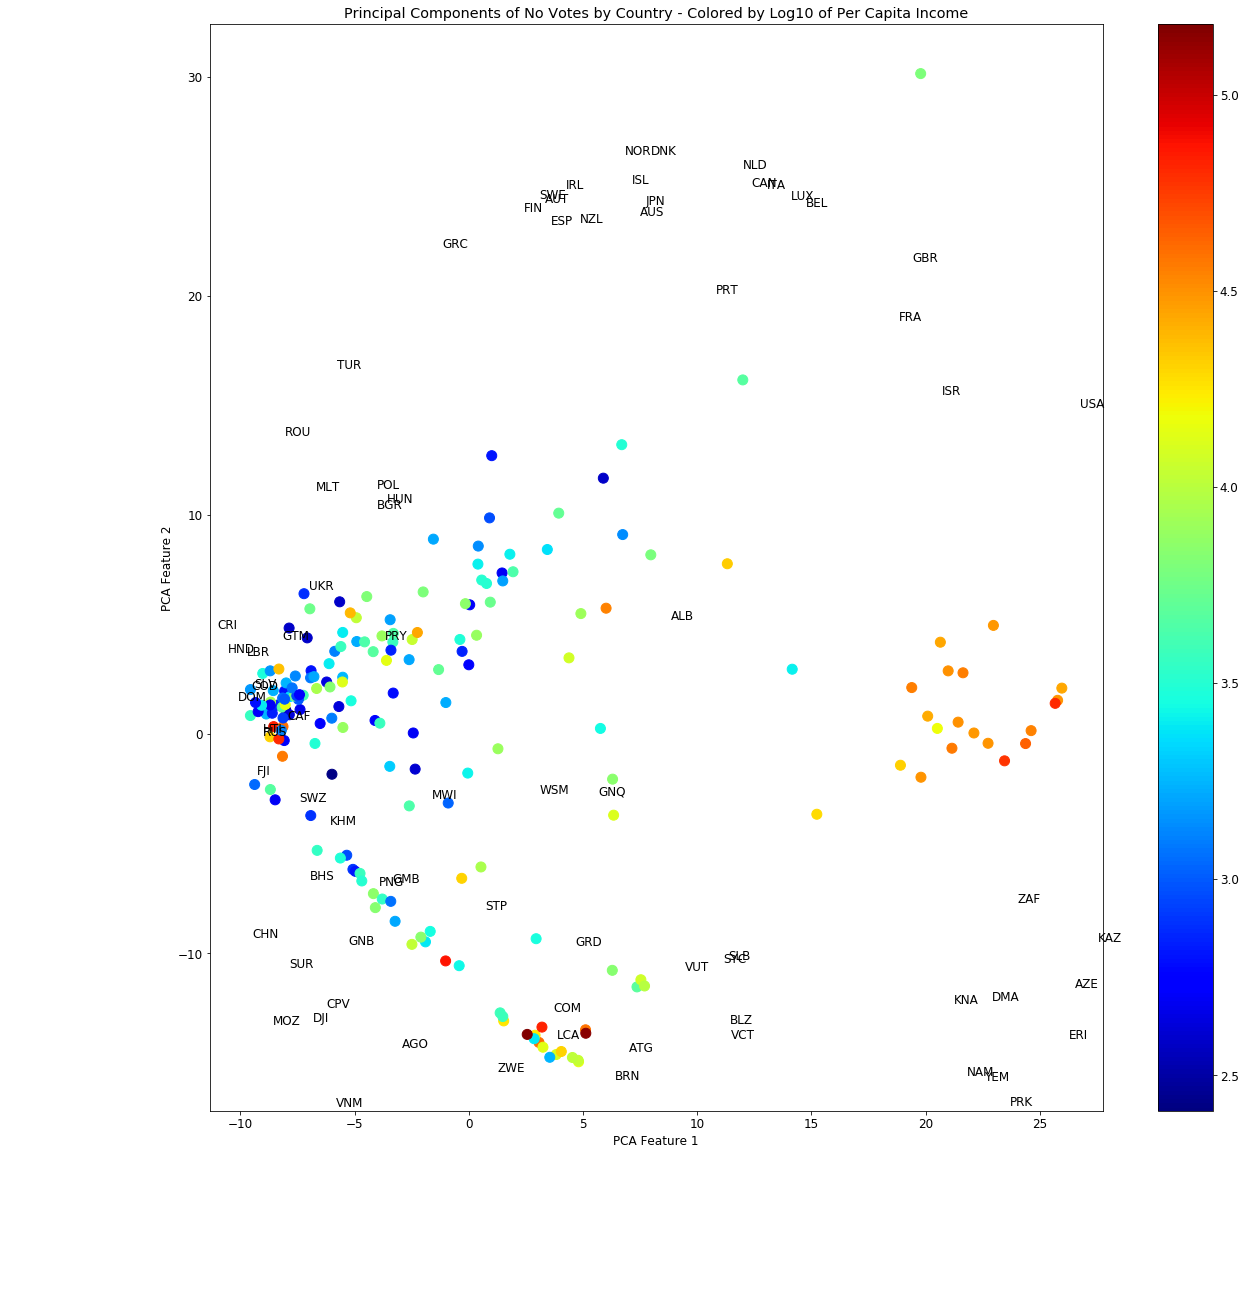

In [25]:
# Colorize the PCA of no votes based on each country's average per capita GDP.

# This graph is less visually satisfying. Although PCA is supposed to work better with sparse matrices, and the 'no' matrix
# is sparser than the yes matrix, here the resulting PCA is clustered too tightly together to be easily readable, and 
# both PCAs execute quickly because the matrix is relatively compact (on the order of 2000 x 200).

rcParams['figure.figsize'] = 20, 20
plt.rcParams.update({'font.size': 12})

vote_matrix_countries = np.transpose(no_matrix)


pca2 = PCA(n_components=2)
vote_pca_countries = pca2.fit_transform(vote_matrix_countries)
vote_x = vote_pca_countries[:, 0]
vote_y = vote_pca_countries[:, 1]


pca_df_2 = pd.DataFrame({'x':vote_x, 'y':vote_y}, 
                  index=list(vote_df.columns))

#plt.scatter(vote_x, vote_y, c=np.log(percapitas.values), cmap='jet',alpha=0.5, ax=ax)
#pca_df = pd.DataFrame(vote_x, vote_y)

fig, ax = plt.subplots()
pca_df_2.plot('x', 'y', kind='scatter', c=np.log10(percapitas.values), cmap='jet', alpha=1, ax=ax ,s=100)

for k, v in pca_df.iterrows():
    ax.annotate(k, v)

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Principal Components of No Votes by Country - Colored by Log10 of Per Capita Income')    

# Export to new file
pca_df_2.to_csv("Modified_Data/PCA_no.csv")
    
plt.show()